# FEEED
**Fe**ature **E**xtraction for **E**vent-**D**ata

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tqdm import tqdm
from feeed import extract_features

## Feature extraction
### Feature extraction for one single event dataset (Sepsis)

The parameter 'INPUT_PATH' specifies the path to the event dataset location in memory.

Output is a dictionary including a key and value for every feature extracted.

In [39]:
import warnings 
warnings.filterwarnings('ignore')

INPUT_PATH = 'test_logs/Sepsis.xes'
sepsis_features=extract_features(INPUT_PATH)
print("Extracted ", len(sepsis_features), " features")


     INFO: Sepsis.xes 3 simple_stats took 0:00:00.007488 sec, next trace_length...
     INFO: Sepsis.xes 32 trace_length took 0:00:00.005754 sec, next trace_variant...
     INFO: Sepsis.xes 43 trace_variant took 0:00:00.012001 sec, next activities...
     INFO: Sepsis.xes 55 activities took 0:00:00.011559 sec, next start_activities...
     INFO: Sepsis.xes 67 start_activities took 0:00:00.115551 sec, next end_activities...
     INFO: Sepsis.xes 79 end_activities took 0:00:00.373667 sec, next entropies...
     INFO: Sepsis.xes 92 entropies took 0:00:19.294717 sec, next complexity...


parsing log, completed traces :: 100%|███████████████████████████████████████████████████████████████████| 1050/1050 [00:00<00:00, 1915.11it/s]


     INFO: Sepsis.xes 100 complexity took 0:00:01.077249 sec, last feature.
SUCCESSFULLY: 101 features for Sepsis.xes took 0:00:20.898685 sec.
Extracted  101  features


### Feature extraction for multiple event-logs
By especifying ['complexity'], we select **complexity features** only: 'normalized_variant_entropy', 'sequence_entropy', 'normalized_sequence_entropy', 'sequence_entropy_linear_forgetting', 'normalized_sequence_entropy_linear_forgetting', 'sequence_entropy_exponential_forgetting', 'normalized_sequence_entropy_exponential_forgetting'

The output dictionaries can be concatenated to a dataframe:

In [40]:
path = "test_logs"
combined_features = pd.DataFrame()

print("Extracting features")

file_names = tqdm(sort_files(os.listdir(path)))
print(sort_files(os.listdir(path)))
for file in file_names:

    features = extract_features(path+"/"+file, ['complexity'])
    temp = pd.DataFrame.from_dict([features])
    combined_features = pd.concat([combined_features, temp], ignore_index=True)

combined_features

Extracting features


  0%|                                                                                                                    | 0/2 [00:00<?, ?it/s]

['BPI_Challenge_2013_closed_problems.xes', 'Sepsis.xes']



 50%|██████████████████████████████████████████████████████                                                      | 1/2 [00:01<00:01,  1.59s/it]

     INFO: BPI_Challenge_2013_closed_problems.xes 8 complexity took 0:00:01.118509 sec, last feature.
SUCCESSFULLY: 9 features for BPI_Challenge_2013_closed_problems.xes took 0:00:01.118626 sec.



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.71s/it]

     INFO: Sepsis.xes 8 complexity took 0:00:01.315094 sec, last feature.
SUCCESSFULLY: 9 features for Sepsis.xes took 0:00:01.315258 sec.


,log,variant_entropy,normalized_variant_entropy,sequence_entropy,normalized_sequence_entropy,sequence_entropy_linear_forgetting,normalized_sequence_entropy_linear_forgetting,sequence_entropy_exponential_forgetting,normalized_sequence_entropy_exponential_forgetting
0,BPI_Challenge_2013_closed_problems,3502.264471,0.705383,18231.591304,0.310940,16799.485682,0.286515,16909.014827,0.288383
1,Sepsis,40624.493298,0.695759,76528.679475,0.522343,32139.284589,0.219365,43880.539191,0.299505


### Feature extraction for benchmark event data
We extracted features for multiple event data from benchmark.


In [41]:
benchmark_features = pd.read_csv("../tag/data/benchmark_features.csv", index_col=None)
#benchmark_features = pd.read_csv("../tag/output/features/real_event_logs.csv", index_col=None)

#benchmark_features = benchmark_features.drop(['Unnamed: 0'], axis=1)
print(benchmark_features.shape)
print(len(benchmark_features), " Event-Logs: ", benchmark_features.sort_values('log')['log'].unique())
benchmark_features.head()

(23, 102)
23  Event-Logs:  ['BPIC15_1' 'BPIC15_2' 'BPIC15_3' 'BPIC15_4' 'BPIC15_5'
 'BPI_Challenge_2012' 'BPI_Challenge_2013_closed_problems'
 'BPI_Challenge_2013_incidents' 'BPI_Challenge_2017'
 'BPI_Challenge_2017_Offer_log' 'BPI_Challenge_2018' 'BPI_Challenge_2019'
 'CoSeLoG_WABO_2' 'CoSeLoG_WABO_3' 'DomesticDeclarations' 'Hospital_log'
 'InternationalDeclarations' 'PermitLog' 'PrepaidTravelCost'
 'Receipt_WABO_CoSeLoG' 'RequestForPayment'
 'Road_Traffic_Fine_Management_Process' 'Sepsis_Cases_Event_Log']


,log,n_traces,n_unique_traces,ratio_unique_traces_per_trace,trace_len_min,trace_len_max,trace_len_mean,trace_len_median,trace_len_mode,trace_len_std,...,entropy_knn_7,Log Nature,variant_entropy,normalized_variant_entropy,sequence_entropy,normalized_sequence_entropy,sequence_entropy_linear_forgetting,normalized_sequence_entropy_linear_forgetting,sequence_entropy_exponential_forgetting,normalized_sequence_entropy_exponential_forgetting
0,BPIC15_2,832,828,0.995192,1,132,53.310096,54.0,61,19.894977,...,4.721,Real,2.405122e+05,0.627973,2.858769e+05,0.602371,1.505466e+05,0.317217,1.853129e+05,0.390473
1,BPI_Challenge_2018,43809,28457,0.649570,24,2973,57.391541,49.0,49,34.872131,...,7.067,Real,1.156384e+07,0.712079,2.114626e+07,0.570688,1.414023e+07,0.381612,1.557608e+07,0.420362
2,Receipt_WABO_CoSeLoG,1434,116,0.080893,1,25,5.981172,6.0,6,2.166129,...,2.584,Real,2.382326e+03,0.689363,1.829627e+04,0.235532,7.814868e+03,0.100603,1.072870e+04,0.138113
3,BPIC15_3,1409,1349,0.957417,3,124,42.356991,42.0,44,16.138406,...,4.900,Real,2.981464e+05,0.661781,3.975043e+05,0.605676,2.241393e+05,0.341521,2.657571e+05,0.404934
4,BPI_Challenge_2019,251734,11973,0.047562,1,990,6.339720,5.0,5,13.057417,...,6.601,Real,1.690369e+06,0.645530,7.477256e+06,0.328029,7.298458e+06,0.320185,7.300663e+06,0.320282


In [42]:
import pandas as pd
import os
import json

# Define the directory containing the JSON files
directory = '../tag/output/features/real_event_logs_time/'

# Initialize an empty dataframe
df = pd.DataFrame()
# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        i_path = os.path.join(directory, filename)
        with open(i_path) as f:
            #temp_df = pd.read_json(i_path, orient='records')
            #print(temp_df)
            data = json.load(f)
            temp_df = pd.DataFrame([data])
            df = pd.concat([df, temp_df])
#df = df.set_index('log')
benchmark_time_features = pd.merge(benchmark_features, df)
#benchmark_features = pd.merge(benchmark_features, df)
print(benchmark_features.shape, benchmark_features.sort_values('log')['log'].unique())
df.head()



(23, 102) ['BPIC15_1' 'BPIC15_2' 'BPIC15_3' 'BPIC15_4' 'BPIC15_5'
 'BPI_Challenge_2012' 'BPI_Challenge_2013_closed_problems'
 'BPI_Challenge_2013_incidents' 'BPI_Challenge_2017'
 'BPI_Challenge_2017_Offer_log' 'BPI_Challenge_2018' 'BPI_Challenge_2019'
 'CoSeLoG_WABO_2' 'CoSeLoG_WABO_3' 'DomesticDeclarations' 'Hospital_log'
 'InternationalDeclarations' 'PermitLog' 'PrepaidTravelCost'
 'Receipt_WABO_CoSeLoG' 'RequestForPayment'
 'Road_Traffic_Fine_Management_Process' 'Sepsis_Cases_Event_Log']


,log,accumulated_time_time_min,accumulated_time_time_max,accumulated_time_time_mean,accumulated_time_time_median,accumulated_time_time_mode,accumulated_time_time_std,accumulated_time_time_variance,accumulated_time_time_q1,accumulated_time_time_q3,...,within_day_time_iqr,within_day_time_geometric_mean,within_day_time_geometric_std,within_day_time_harmonic_mean,within_day_time_skewness,within_day_time_kurtosis,within_day_time_coefficient_variation,within_day_time_entropy,within_day_time_skewness_hist,within_day_time_kurtosis_hist
0,BPIC15_2,0.0,1.145628e+08,7.195987e+06,3888000.00,0.0,1.090649e+07,1.189515e+14,691200.000,8380800.000,...,44011.000,52550.521152,1.527808,47979.360126,-0.026888,-1.728454,0.388055,10.621648,1.921282,2.753268
0,Receipt_WABO_CoSeLoG,0.0,2.383254e+07,2.379880e+05,130.27,0.0,9.204637e+05,8.472534e+11,33.736,10406.875,...,15654.131,38006.713071,1.276102,36885.485682,0.301650,-0.556238,0.240037,9.028104,-0.042383,-1.794202
0,BPIC15_3,0.0,1.306368e+08,4.338386e+06,2371126.00,0.0,7.671908e+06,5.885817e+13,897372.000,4698477.000,...,45520.000,50338.135137,1.558831,45638.821875,0.091144,-1.758850,0.414249,10.908731,1.718812,2.140095
0,BPI_Challenge_2019,0.0,2.217935e+09,3.151367e+06,682320.00,0.0,2.334700e+07,5.450824e+14,480.000,2899680.000,...,42120.000,40554.292135,2.416683,0.000000,-0.006671,-0.811969,0.449193,14.167672,0.283161,-1.133420
0,RequestForPayment,0.0,3.507780e+07,5.049570e+05,132234.00,0.0,1.227825e+06,1.507555e+12,10.000,607301.250,...,23279.250,41185.497033,1.411680,37709.095132,0.077411,-0.506198,0.304423,10.465119,0.487789,-1.478166


### Similarity search for event data through extracted features

In [43]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.impute import SimpleImputer

logs = benchmark_features['log']
benchmark_features_num = benchmark_features.set_index('log')
benchmark_features_num = benchmark_features_num.select_dtypes(exclude=['object'])

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_features = imputer_mean.fit_transform(benchmark_features_num)

features_similarity = pd.DataFrame(pairwise_distances(imputed_features, metric='cosine'), columns=logs, index= logs)
features_similarity.index.name=None
features_similarity.columns.name=None
print(features_similarity.shape)
features_similarity

(23, 23)


,BPIC15_2,BPI_Challenge_2018,Receipt_WABO_CoSeLoG,BPIC15_3,BPI_Challenge_2019,RequestForPayment,PrepaidTravelCost,DomesticDeclarations,BPIC15_4,BPI_Challenge_2012,...,Road_Traffic_Fine_Management_Process,BPI_Challenge_2017_Offer_log,Sepsis_Cases_Event_Log,CoSeLoG_WABO_3,BPI_Challenge_2013_closed_problems,BPI_Challenge_2013_incidents,PermitLog,BPIC15_1,InternationalDeclarations,BPI_Challenge_2017
BPIC15_2,0.000000,0.917595,0.857354,0.025128,0.890317,0.888552,0.830428,0.894731,0.003689,0.912457,...,0.923349,0.922897,0.814978,0.021176,0.899680,0.916277,0.848866,0.005800,0.862594,0.918333
BPI_Challenge_2018,0.917595,0.000000,0.015707,0.846110,0.159980,0.455208,0.356806,0.438231,0.876604,0.000188,...,0.041861,0.045888,0.011177,0.864518,0.008966,0.002086,0.364776,0.877737,0.195387,0.000161
Receipt_WABO_CoSeLoG,0.857354,0.015707,0.000000,0.791797,0.162597,0.437547,0.313639,0.397647,0.816626,0.014633,...,0.010956,0.012744,0.020731,0.809697,0.026785,0.008139,0.350821,0.820399,0.164027,0.015307
BPIC15_3,0.025128,0.846110,0.791797,0.000000,0.725506,0.690912,0.653714,0.709787,0.014535,0.844705,...,0.858363,0.858200,0.725644,0.002306,0.802487,0.841376,0.657602,0.011706,0.706078,0.850414
BPI_Challenge_2019,0.890317,0.159980,0.162597,0.725506,0.000000,0.088543,0.062365,0.093971,0.837070,0.169227,...,0.168706,0.170415,0.108770,0.747039,0.097655,0.144536,0.048553,0.812554,0.019595,0.169408
RequestForPayment,0.888552,0.455208,0.437547,0.690912,0.088543,0.000000,0.024090,0.012181,0.837591,0.468877,...,0.420536,0.419385,0.368366,0.710163,0.354361,0.426498,0.007371,0.799811,0.080683,0.469308
PrepaidTravelCost,0.830428,0.356806,0.313639,0.653714,0.062365,0.024090,0.000000,0.008208,0.778908,0.367240,...,0.288739,0.286304,0.279050,0.673742,0.274722,0.323077,0.016597,0.750372,0.028619,0.368295
DomesticDeclarations,0.894731,0.438231,0.397647,0.709787,0.093971,0.012181,0.008208,0.000000,0.845563,0.450287,...,0.363484,0.360584,0.358535,0.728618,0.347387,0.402227,0.019308,0.811279,0.058791,0.450927
BPIC15_4,0.003689,0.876604,0.816626,0.014535,0.837070,0.837591,0.778908,0.845563,0.000000,0.872044,...,0.884581,0.884268,0.770807,0.015111,0.854061,0.874673,0.796221,0.006566,0.811145,0.877971
BPI_Challenge_2012,0.912457,0.000188,0.014633,0.844705,0.169227,0.468877,0.367240,0.450287,0.872044,0.000000,...,0.040942,0.044927,0.012688,0.862906,0.011475,0.002420,0.377237,0.874204,0.203387,0.000021


In [44]:
links = features_similarity.stack().reset_index()
#links.index(dmf['log'])
links.columns = ['var1', 'var2', 'value']
links['sca_value'] = (links['value'] - links['value'].min()) / (links['value'].max() - links['value'].min())   

filtered_features = pd.DataFrame()
for log in logs:
    filtered_features = pd.concat([filtered_features,links[links['var1']==log].nsmallest(4, 'value')], ignore_index=True)
 
filtered_features=filtered_features.loc[(filtered_features['var1'] != filtered_features['var2'])]

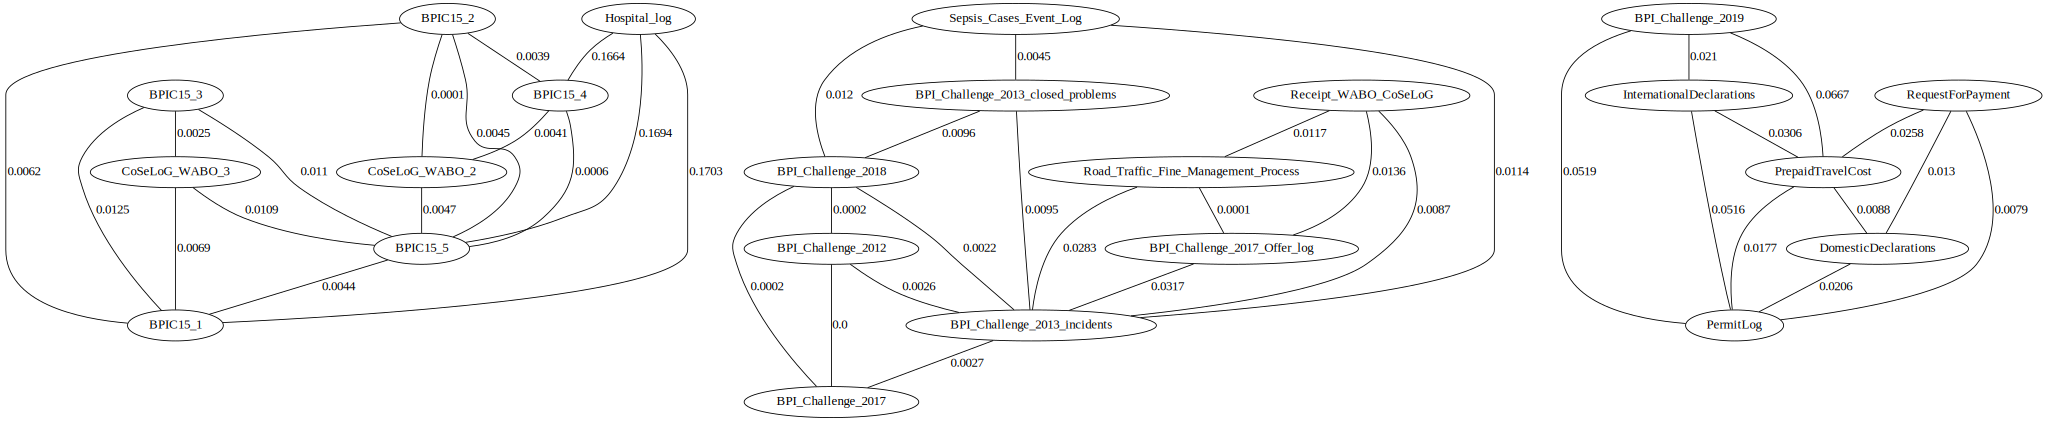

In [45]:
import graphviz as gv

#filtered_features['sca_value'] = (filtered_features['value'] - filtered_features['value'].min()) / (filtered_features['value'].max() - filtered_features['value'].min())   
filtered_features['nodes']=filtered_features.apply(lambda x: (x['var1'], x['var2']), axis=1)
e_l = filtered_features[['nodes','sca_value']].set_index('nodes').transpose().to_dict(orient='records')[0]

g = gv.Graph(format="png", strict=True)
for k, v in e_l.items():
    g.node(k[0], fontsize="15")
    g.edge(k[0], k[1], len=str(v), label=str(round(v, 4)), fontsize="15")
g
#g.render('similarity_top3_102', view = True)

In [46]:
filtered_features.sort_values('value')

,var1,var2,value,sca_value,nodes
89,BPI_Challenge_2017,BPI_Challenge_2012,0.000021,0.000022,"(BPI_Challenge_2017, BPI_Challenge_2012)"
37,BPI_Challenge_2012,BPI_Challenge_2017,0.000021,0.000022,"(BPI_Challenge_2012, BPI_Challenge_2017)"
53,Road_Traffic_Fine_Management_Process,BPI_Challenge_2017_Offer_log,0.000095,0.000102,"(Road_Traffic_Fine_Management_Process, BPI_Cha..."
57,BPI_Challenge_2017_Offer_log,Road_Traffic_Fine_Management_Process,0.000095,0.000102,"(BPI_Challenge_2017_Offer_log, Road_Traffic_Fi..."
1,BPIC15_2,CoSeLoG_WABO_2,0.000130,0.000139,"(BPIC15_2, CoSeLoG_WABO_2)"
...,...,...,...,...,...
18,BPI_Challenge_2019,PermitLog,0.048553,0.051925,"(BPI_Challenge_2019, PermitLog)"
19,BPI_Challenge_2019,PrepaidTravelCost,0.062365,0.066697,"(BPI_Challenge_2019, PrepaidTravelCost)"
41,Hospital_log,BPIC15_4,0.155571,0.166376,"(Hospital_log, BPIC15_4)"
42,Hospital_log,BPIC15_5,0.158444,0.169449,"(Hospital_log, BPIC15_5)"


### Extracted features value distribution in benchmark datasets

23 ['BPIC15_2' 'BPI_Challenge_2018' 'Receipt_WABO_CoSeLoG' 'BPIC15_3'
 'BPI_Challenge_2019' 'RequestForPayment' 'PrepaidTravelCost'
 'DomesticDeclarations' 'BPIC15_4' 'BPI_Challenge_2012' 'Hospital_log'
 'BPIC15_5' 'CoSeLoG_WABO_2' 'Road_Traffic_Fine_Management_Process'
 'BPI_Challenge_2017_Offer_log' 'Sepsis_Cases_Event_Log' 'CoSeLoG_WABO_3'
 'BPI_Challenge_2013_closed_problems' 'BPI_Challenge_2013_incidents'
 'PermitLog' 'BPIC15_1' 'InternationalDeclarations' 'BPI_Challenge_2017']


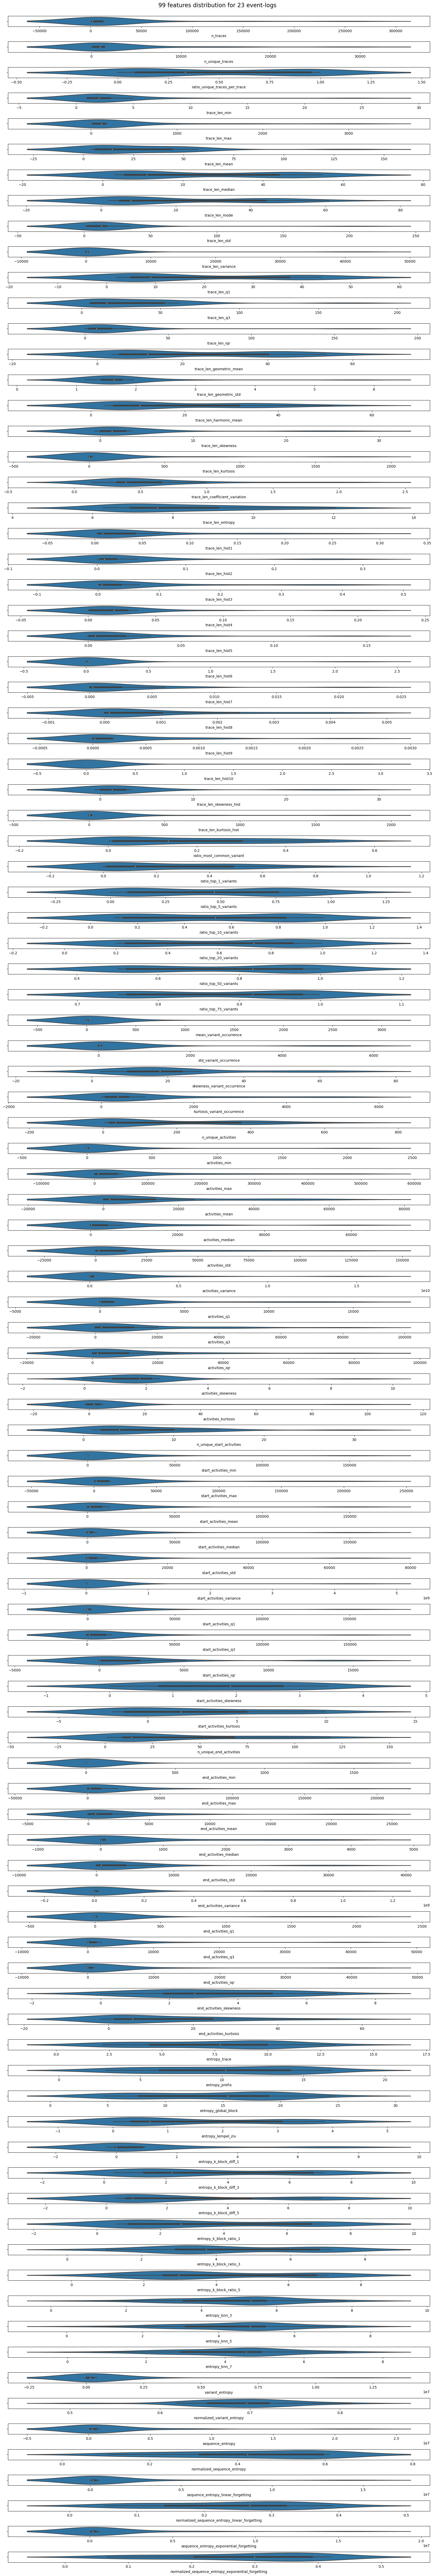

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

print(len(benchmark_features), benchmark_features['log'].unique())

columns = benchmark_features.columns[3:]
dmf1=benchmark_features.select_dtypes(exclude=['object'])

fig, axes = plt.subplots(len(dmf1.columns),1, figsize=(17,len(dmf1.columns)))
for i, ax in enumerate(axes):
        sns.violinplot(data=benchmark_features, x=dmf1.columns[i], ax=ax)
fig.suptitle(f"{len(columns)} features distribution for {len(benchmark_features)} event-logs", fontsize=16, y=1)
fig.tight_layout()

### Concatinating multiple features (Dataframe and dictionaries)

In [48]:
import json
path = "../tag/output/features/real_event_logs_time/"
combined_features = pd.DataFrame()

file_names = tqdm(sort_files(os.listdir(path)))

combined_results = []
for file in file_names:
    f = open(path+file, 'r')
    combined_results.append(json.load(f))

new_features = pd.DataFrame(combined_results)
new_features = new_features.set_index('log')

result = pd.concat([df.reset_index(), new_features.reset_index()], axis=1, join="inner").drop(['index'], axis=1)
result.shape
result.head()
#result.to_csv("../tag/data/benchmark_features.csv")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 6864.21it/s]


,log,accumulated_time_time_min,accumulated_time_time_max,accumulated_time_time_mean,accumulated_time_time_median,accumulated_time_time_mode,accumulated_time_time_std,accumulated_time_time_variance,accumulated_time_time_q1,accumulated_time_time_q3,...,within_day_time_iqr,within_day_time_geometric_mean,within_day_time_geometric_std,within_day_time_harmonic_mean,within_day_time_skewness,within_day_time_kurtosis,within_day_time_coefficient_variation,within_day_time_entropy,within_day_time_skewness_hist,within_day_time_kurtosis_hist
0,BPIC15_2,0.0,1.145628e+08,7.195987e+06,3888000.00,0.0,1.090649e+07,1.189515e+14,691200.000,8380800.000,...,22577.4460,46508.595619,1.383851,37397.111284,0.155195,-0.761981,0.281006,12.436519,-0.018965,-1.764378
1,Receipt_WABO_CoSeLoG,0.0,2.383254e+07,2.379880e+05,130.27,0.0,9.204637e+05,8.472534e+11,33.736,10406.875,...,18363.5000,40360.910336,1.526558,33181.959848,0.213421,0.538143,0.323269,8.748695,0.487151,-1.572121
2,BPIC15_3,0.0,1.306368e+08,4.338386e+06,2371126.00,0.0,7.671908e+06,5.885817e+13,897372.000,4698477.000,...,22157.0000,41233.932155,1.716157,0.000000,0.408802,-0.143619,0.405553,11.004878,0.372863,-1.376303
3,BPI_Challenge_2019,0.0,2.217935e+09,3.151367e+06,682320.00,0.0,2.334700e+07,5.450824e+14,480.000,2899680.000,...,18986.0935,41186.940327,1.379998,37870.532537,0.443494,-0.336989,0.305210,13.953405,0.369874,-1.480433
4,RequestForPayment,0.0,3.507780e+07,5.049570e+05,132234.00,0.0,1.227825e+06,1.507555e+12,10.000,607301.250,...,19090.6460,41416.157015,1.352987,39528.534375,0.287220,-0.703945,0.291763,12.132120,-0.037979,-1.494704


### References
| Benchmark event-log                             | Challenge URL |
|----------------------------------------|-------------------------------------------------------|
| 'BPIC15_1'                             | https://www.win.tue.nl/bpi/doku.php?id=2015:challenge |
| 'BPIC15_2'                             | https://www.win.tue.nl/bpi/doku.php?id=2015:challenge |
| 'BPIC15_3'                             | https://www.win.tue.nl/bpi/doku.php?id=2015:challenge |
| 'BPIC15_4'                             | https://www.win.tue.nl/bpi/doku.php?id=2015:challenge |
| 'BPIC15_5'                             | https://www.win.tue.nl/bpi/doku.php?id=2015:challenge |
| 'BPI_Challenge_2012'                   |                                                       |
| 'BPI_Challenge_2013_closed_problems'   |                                                       |
| 'BPI_Challenge_2013_incidents'         |                                                       |
| 'BPI_Challenge_2017'                   |                                                       |
| 'BPI_Challenge_2017_Offer_log'         |                                                       |
| 'BPI_Challenge_2018'                   |                                                       |
| 'BPI_Challenge_2019'                   |                                                       |
| 'CoSeLoG_WABO_2'                       |                                                       |
| 'CoSeLoG_WABO_3'                       |                                                       |
| 'DomesticDeclarations'                 |                                                       |
| 'Hospital_log'                         |                                                       |
| 'InternationalDeclarations'            |                                                       |
| 'PermitLog'                            |                                                       |
| 'PrepaidTravelCost'                    |                                                       |
| 'Receipt_WABO_CoSeLoG'                 |                                                       |
| 'RequestForPayment'                    |                                                       |
| 'Road_Traffic_Fine_Management_Process' |                                                       |
| 'Sepsis_Cases_Event_Log'               |        https://data.4tu.nl/articles/dataset/Sepsis_Cases_-_Event_Log/12707639                                               |